Importing the Libraries

In [1]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import json
import os
import math

labels=['pop','metal','disco','blues','reggae','classical','rock','hiphop','country','jazz'] #List of genres is dataset
wav_path = 'GTZAN/genres/' #Relative location of dataset
files=[] #Empty list to store audio filenames

for label in labels: #Iterating through all genres
    files.append(wav_path+label+'/'+label+'.00000.wav') #Adding first audio of each genre to files list

sounds=[] #Empty list to store audios
for file in files: #Iterating through stored filenames
    signal, sample_rate = librosa.load(file, sr=22050) #Loading audio as a numpy array and its sampling rate
    sounds.append(signal) #Adding loaded audio into sounds list
        
i = 1
fig = plt.figure(figsize=(20,15)) #Setting plot dimensions
for n,sound in zip(labels,sounds): #Iterating through genre names and corresponding audios
    plt.subplot(10,1,i)
    librosa.display.waveplot(sound,sample_rate) #Plotting waveplot of loaded audio
    plt.title(n.title())
    plt.axis('off')
    i += 1
plt.show() 

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: ignored

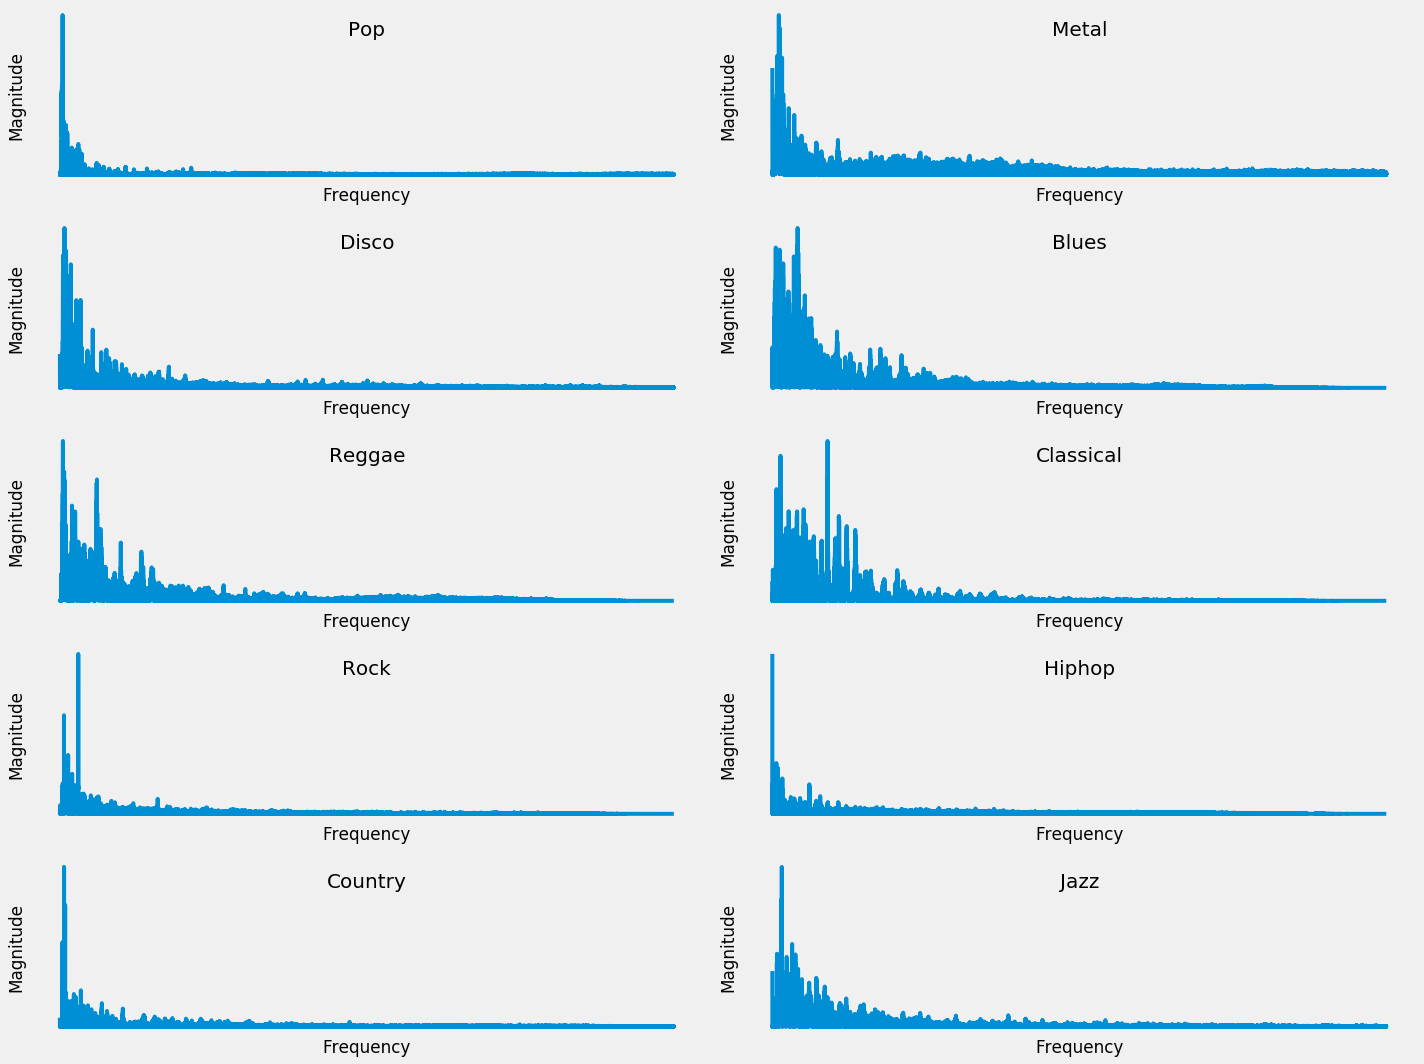

In [ ]:
fig = plt.figure(figsize=(20,15)) #Setting plot dimensions
i=1
for n,sound in zip(labels,sounds): #Iterating through genre names and corresponding audios
    plt.subplot(5,2,i)
    fft = np.fft.fft(sound) #Computes discrete fourier transform
    spectrum = np.abs(fft) #Considering only real part of fourier transform
    f = np.linspace(0, sample_rate, len(spectrum))
    left_spectrum = spectrum[:int(len(spectrum)/2)] #Dividing frequency spectrum into half as it is a mirror image
    left_f = f[:int(len(spectrum)/2)] #Dividing frequency spectrum into half as it is a mirror image

    plt.plot(left_f, left_spectrum) #Plot frequency spectrum for loaded audio
    plt.title(n.title(), y=0.8, fontsize=20) #Title the plot as its genre
    plt.xticks(())
    plt.yticks(())
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    i += 1
    
plt.tight_layout()
plt.show()

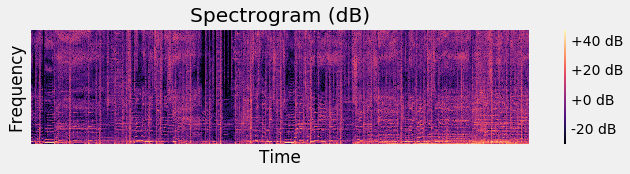

In [ ]:
hop_length = 512 #number of audio samples between adjacent stft columns
n_fft = 2048 #length of the windowed signal after padding with zeros

stft = librosa.stft(sounds[0], n_fft=n_fft, hop_length=hop_length) #Computes Short-time Fourier transform (STFT)
spectrogram = np.abs(stft) #Considering only real part of stft
log_spectrogram = librosa.amplitude_to_db(spectrogram) #Convert an amplitude spectrogram to dB-scaled spectrogram.

plt.figure(figsize=(10,2)) #Setting plot dimensions
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length,cmap='magma') #Displays a spectrogram
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)");

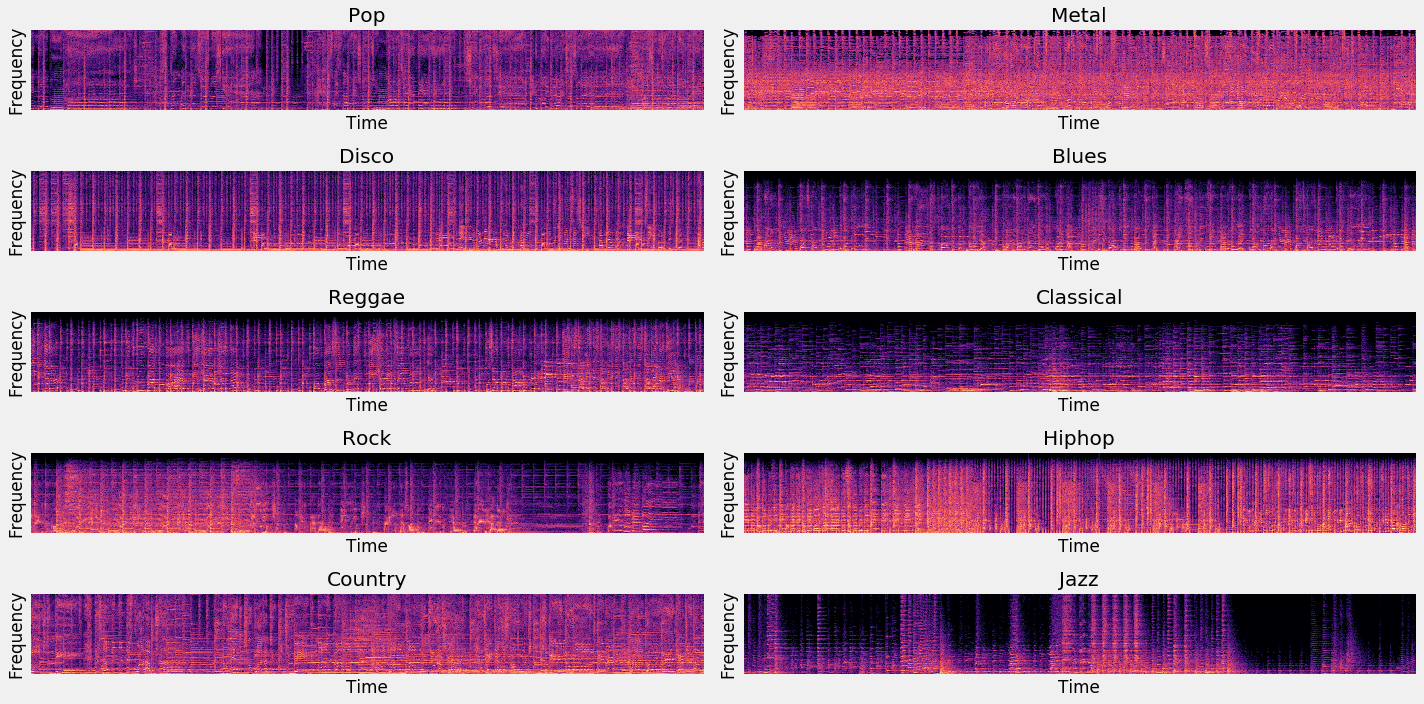

In [ ]:
plt.figure(figsize=(20,10)) #Setting plot dimensions
i=1

for n,sound in zip(labels,sounds): #Iterating through genre names and corresponding audios
    stft = librosa.stft(sound, n_fft=n_fft, hop_length=hop_length) #Computes Short-time Fourier transform (STFT)
    spectrogram = np.abs(stft) #Considering only real part of stft
    log_spectrogram = librosa.amplitude_to_db(spectrogram) #Convert an amplitude spectrogram to dB-scaled spectrogram.
    
    plt.subplot(5,2,i) 
    librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length,cmap='magma') #Displays a spectrogram
    plt.title(n.title())
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    i=i+1

plt.tight_layout()
plt.show()

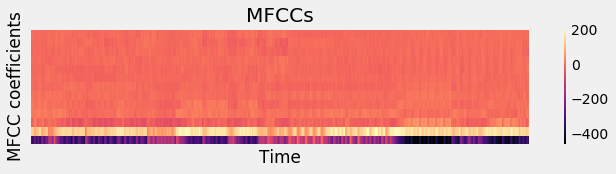

In [ ]:
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13) #Computes Mel-frequency cepstral coefficients (MFCCs)

plt.figure(figsize=(10,2)) #Setting plot dimensions
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length,cmap='magma') #Displays a spectrogram
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
plt.show()

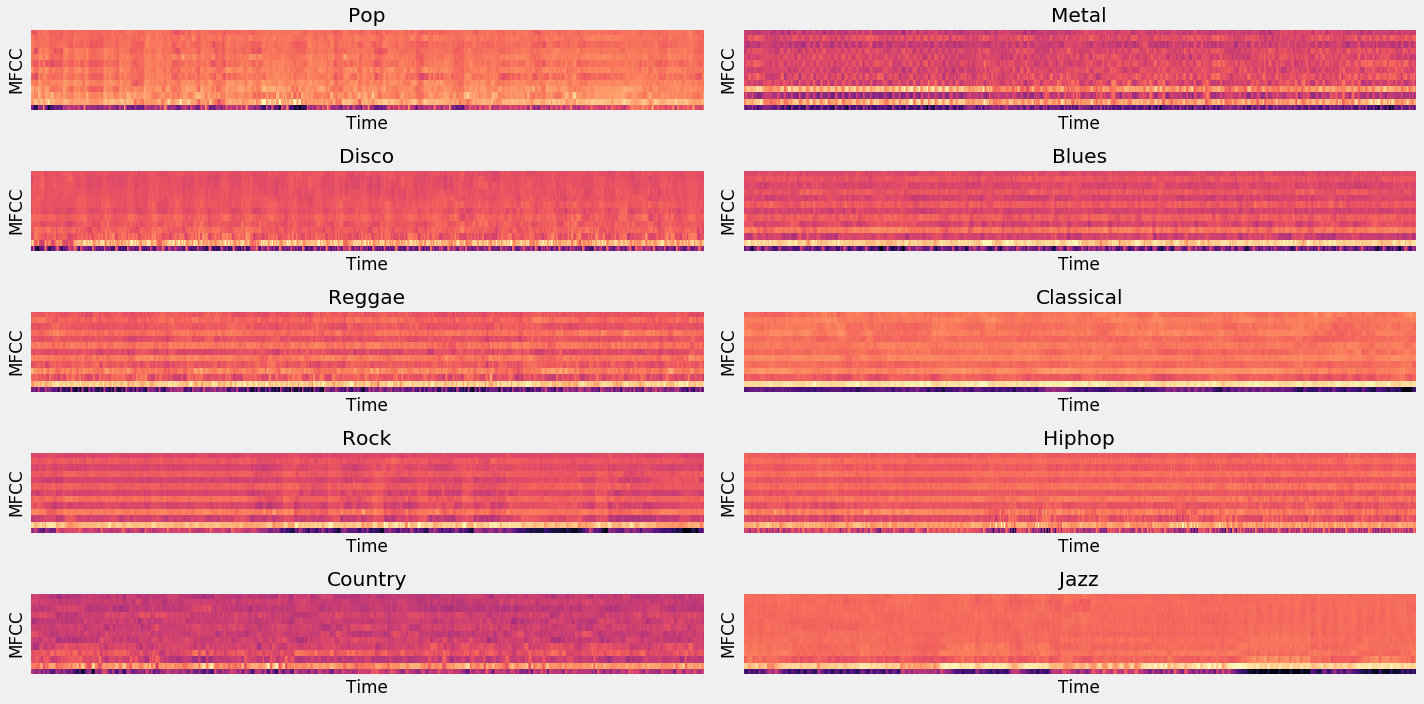

In [ ]:
plt.figure(figsize=(20,10)) #Setting plot dimensions
i=1
for n,sound in zip(labels,sounds): #Iterating through genre names and corresponding audios
    plt.subplot(5,2,i)
    MFCCs = librosa.feature.mfcc(sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13) #Computes Mel-frequency cepstral coefficients (MFCCs)
    librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length,cmap='magma') #Displays a spectrogram

    plt.title(n.title())
    plt.xlabel("Time")
    plt.ylabel("MFCC")
    i=i+1

plt.tight_layout()
plt.show()

In [ ]:
samples_per_audio = sample_rate * 30 #Dataset has audio of 30 seconds duration
num_mfcc=13 #Number of MFCCs to be stores
num_segments=10 #Number of segments input audio is to be divided into

data = {
    "mapping": [],
    "labels": [],
    "mfcc": []
} #Dictionary to store filename, genre and the MFCCs of all audios

samples_per_segment = int(samples_per_audio / num_segments) #Number of samples in each segment
num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length) #Number of MFCCs stored in each segment

In [ ]:
for i, (directory_path, _, filename) in enumerate(os.walk(wav_path)): #Iterating through all audios in dataset
    if directory_path is not wav_path:
        label = directory_path.split("/")[-1] #Storing genre name
        data["mapping"].append(label) #Adding genre name to the dictionary
        print("Processing: {}".format(label))
        
        for f in filename:
            file_path = os.path.join(directory_path, f) #Relative location of audio file
            signal, sample_rate = librosa.load(file_path, sr=sample_rate) #Loading audio as a numpy array and its sampling rate 
            
            for d in range(num_segments): #Iterating for each segment in audio
                start = samples_per_segment * d #Setting start of window to compute MFCCs
                finish = start + samples_per_segment #Setting end of window to compute MFCCs
                mfcc = librosa.feature.mfcc(signal[start:finish],
                                            sample_rate,
                                            n_mfcc=num_mfcc,
                                            n_fft=n_fft,
                                            hop_length=hop_length) #Computes Mel-frequency cepstral coefficients (MFCCs)
                mfcc = mfcc.T #Taking transpose of MFCCs
                
                if len(mfcc) == num_mfcc_vectors_per_segment: #If all MFCCs are extracted
                    data["mfcc"].append(mfcc.tolist()) #Storing MFCCs in dictionary
                    data["labels"].append(i-1) #Storing genre name in dictionary

Processing: pop
Processing: metal
Processing: disco
Processing: blues
Processing: reggae
Processing: classical
Processing: rock
Processing: hiphop
Processing: country
Processing: jazz


In [ ]:
with open("gtzan_mfcc.json", "w") as file: 
    json.dump(data, file) #Store the dictionary created as JSON file